In [828]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
#from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)


#### Repetition of pre-processing and feature engineering steps

In [831]:
loan_data_01 = pd.read_csv(r'C:\Users\steve\OneDrive\Bureaublad\LoanPrediction_TrainSet.csv', parse_dates=True, delimiter=',')
# Make sure to display the personal file path on pc or laptop, and have the comma (,) sign as the delimiter. 
display(loan_data_01)

,Unnamed: 0,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [833]:
# Transforming all object to integer data types

loan_data_02 = loan_data_01.drop(columns=['LoanID', 'Unnamed: 0'])

loan_data_02['LoanStatus'] = loan_data_02['LoanStatus'].map(dict(Y=1, N=0))
loan_data_02['Gender'] = loan_data_02['Gender'].map(dict(Male=1, Female=0))
loan_data_02['Married'] = loan_data_02['Married'].map(dict(Yes=1, No=0))
loan_data_02['SelfEmployed'] = loan_data_02['SelfEmployed'].map(dict(Yes=1, No=0))
loan_data_02['PropertyArea'] = loan_data_02['PropertyArea'].map(dict(Rural=0, Semiurban=1, Urban=2))
le = LabelEncoder()
loan_data_02['Dependents'] = le.fit_transform(loan_data_02['Dependents'])
loan_data_02['Education'] = le.fit_transform(loan_data_02['Education'])


In [835]:
display(loan_data_02)

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,1.0,0.0,0,0,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1,0,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0,0,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0,0,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,1.0,1.0,3,0,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,1.0,1.0,1,0,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,1.0,1.0,2,0,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [837]:
loan_data_02.dtypes

Gender               float64
Married              float64
Dependents             int32
Education              int32
SelfEmployed         float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
LoanAmountTerm       float64
CreditHistory        float64
PropertyArea           int64
LoanStatus             int64
dtype: object

In [839]:
loan_data_02['Gender'] = loan_data_02['Gender'].fillna(loan_data_02['Gender'].mode()[0])
loan_data_02['Married'] = loan_data_02['Married'].fillna(loan_data_02['Married'].mode()[0])
loan_data_02['Dependents'] = loan_data_02['Dependents'].fillna(loan_data_02['Dependents'].mode()[0])
loan_data_02['SelfEmployed'] = loan_data_02['SelfEmployed'].fillna(loan_data_02['SelfEmployed'].mode()[0])
loan_data_02['LoanAmount'] = loan_data_02['LoanAmount'].fillna(loan_data_02['LoanAmount'].mean())
loan_data_02['LoanAmountTerm'] = loan_data_02['LoanAmountTerm'].fillna(loan_data_02['LoanAmountTerm'].mode()[0])
loan_data_02['CreditHistory'] = loan_data_02['CreditHistory'].fillna(loan_data_02['CreditHistory'].mode()[0])

In [841]:
display(loan_data_02)

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,1.0,0.0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1.0,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,1.0,1.0,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,1.0,1.0,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,1.0,1.0,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


In [843]:
# Feature engineering steps

loan_data_02['TotalIncome'] = loan_data_02['ApplicantIncome'] + loan_data_02['CoapplicantIncome']
# moving the new variable feature to the seventh column position
TI_column = loan_data_02.pop('TotalIncome')
loan_data_02.insert(7, TI_column.name, TI_column)

loan_data_02['LoanAmount'] = loan_data_02['LoanAmount'] * 1000
loan_data_02['LoanAmount'] = round(loan_data_02['LoanAmount'], 2)
loan_data_02['InstalmentAmount'] = loan_data_02['LoanAmount'] / loan_data_02['LoanAmountTerm']
loan_data_02['InstalmentAmount'] = round(loan_data_02['InstalmentAmount'], 2)

# moving the new variable feature to the tenth column position
IA_column = loan_data_02.pop('InstalmentAmount')
loan_data_02.insert(10, IA_column.name, IA_column)

loan_data_02['BalancedIncome'] = loan_data_02['TotalIncome'] - loan_data_02['InstalmentAmount'] 

# moving the new variable feature to the eleventh column position
BI_column = loan_data_02.pop('BalancedIncome')
loan_data_02.insert(11, BI_column.name, BI_column)



In [845]:
display(loan_data_02) 

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount,LoanAmountTerm,InstalmentAmount,BalancedIncome,CreditHistory,PropertyArea,LoanStatus
0,1.0,0.0,0,0,0.0,5849,0.0,5849.0,146412.16,360.0,406.70,5442.30,1.0,2,1
1,1.0,1.0,1,0,0.0,4583,1508.0,6091.0,128000.00,360.0,355.56,5735.44,1.0,0,0
2,1.0,1.0,0,0,1.0,3000,0.0,3000.0,66000.00,360.0,183.33,2816.67,1.0,2,1
3,1.0,1.0,0,1,0.0,2583,2358.0,4941.0,120000.00,360.0,333.33,4607.67,1.0,2,1
4,1.0,0.0,0,0,0.0,6000,0.0,6000.0,141000.00,360.0,391.67,5608.33,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0,0.0,2900,0.0,2900.0,71000.00,360.0,197.22,2702.78,1.0,0,1
610,1.0,1.0,3,0,0.0,4106,0.0,4106.0,40000.00,180.0,222.22,3883.78,1.0,0,1
611,1.0,1.0,1,0,0.0,8072,240.0,8312.0,253000.00,360.0,702.78,7609.22,1.0,2,1
612,1.0,1.0,2,0,0.0,7583,0.0,7583.0,187000.00,360.0,519.44,7063.56,1.0,2,1


In [847]:
# Listing the variables with the highest correlation to the target variable, 

my_correlation = loan_data_02.corr(method="spearman")['LoanStatus']
sorted = my_correlation.sort_values(key=abs)
top5 = slice(9,-1)
print(sorted[top5])

InstalmentAmount   -0.042211
LoanAmount         -0.043441
Education          -0.085884
Married             0.091478
CreditHistory       0.540556
Name: LoanStatus, dtype: float64


In [849]:
loan_data_02

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount,LoanAmountTerm,InstalmentAmount,BalancedIncome,CreditHistory,PropertyArea,LoanStatus
0,1.0,0.0,0,0,0.0,5849,0.0,5849.0,146412.16,360.0,406.70,5442.30,1.0,2,1
1,1.0,1.0,1,0,0.0,4583,1508.0,6091.0,128000.00,360.0,355.56,5735.44,1.0,0,0
2,1.0,1.0,0,0,1.0,3000,0.0,3000.0,66000.00,360.0,183.33,2816.67,1.0,2,1
3,1.0,1.0,0,1,0.0,2583,2358.0,4941.0,120000.00,360.0,333.33,4607.67,1.0,2,1
4,1.0,0.0,0,0,0.0,6000,0.0,6000.0,141000.00,360.0,391.67,5608.33,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0,0.0,2900,0.0,2900.0,71000.00,360.0,197.22,2702.78,1.0,0,1
610,1.0,1.0,3,0,0.0,4106,0.0,4106.0,40000.00,180.0,222.22,3883.78,1.0,0,1
611,1.0,1.0,1,0,0.0,8072,240.0,8312.0,253000.00,360.0,702.78,7609.22,1.0,2,1
612,1.0,1.0,2,0,0.0,7583,0.0,7583.0,187000.00,360.0,519.44,7063.56,1.0,2,1


In [851]:
loan_data_02.dtypes

Gender               float64
Married              float64
Dependents             int32
Education              int32
SelfEmployed         float64
ApplicantIncome        int64
CoapplicantIncome    float64
TotalIncome          float64
LoanAmount           float64
LoanAmountTerm       float64
InstalmentAmount     float64
BalancedIncome       float64
CreditHistory        float64
PropertyArea           int64
LoanStatus             int64
dtype: object

# Development of Predictive Models

### Question 10: Machine learning algorithm for the predicting of the LoanStatus target variable

A good machine learning algorithm for predicting the LoanStatus variable can be a classification model. This is because the target variable has two possible categorical outcomes, namely Y (Yes) or N (No). This makes it possible to order all the datapoints into either the Y class, or the N class. The exact algorithm for prediction in this situation would be a logistic regression model. This particular type of classifiation model is perfect for binary classification, where the predicted target variable can have only two possible outcomes, such that there are only two classes to be predicted. The Y (yes) class in this situation can be converted to 1, and the N (no) class to 0. One sidenote to mention is that for the logistic regression algorithm the data sample need to be large enough to make accurate predictions. With a sample size of approximately 600 data items the algorithm could perform sufficient, or unsufficient. 

### Question 11: Logistic Regression model 

The code from the logistic regression model has been modified from source: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [859]:

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [861]:
#Selecting the preditive variables for the model, these are the five variables that have proven to have the highest corrolation with \
#the target variable LoanStatus. 

cols=['CreditHistory', 'Married', 'Education', 'LoanAmount','InstalmentAmount'] 
X=loan_data_02[cols]
y=loan_data_02['LoanStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [863]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.503702
         Iterations 6
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: LoanStatus       Pseudo R-squared: 0.189     
Date:               2024-11-20 21:37 AIC:              628.5460  
No. Observations:   614              BIC:              650.6460  
Df Model:           4                Log-Likelihood:   -309.27   
Df Residuals:       609              LL-Null:          -381.45   
Converged:          1.0000           LLR p-value:      3.3130e-30
No. Iterations:     6.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
CreditHistory      2.2576   0.2092 10.7928 0.0000  1.8476  2.6675
Married            0.1259   0.1994  0.6312 0.5279 -0.2650  0.5167


In [865]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\steve\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [867]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Although the algorithm run out of iterations, it still produced a good accuracy!')

Accuracy of logistic regression classifier on test set: 0.82
Although the algorithm run out of iterations, it still produced a good accuracy!


In [869]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 21  30]
 [  3 131]]


The model made 152 correct predictions and 33 incorrect predictions

In [874]:
# Precision, Recall, F1 score and support measurement
# The support is the total number of occurences of each class

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.41      0.56        51
           1       0.81      0.98      0.89       134

    accuracy                           0.82       185
   macro avg       0.84      0.69      0.72       185
weighted avg       0.83      0.82      0.80       185



### Question 12: Decision tree model 

In [878]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

import matplotlib.image as pltimg

%matplotlib inline


In [880]:
# Displaying the dataset again
loan_data_02

,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,TotalIncome,LoanAmount,LoanAmountTerm,InstalmentAmount,BalancedIncome,CreditHistory,PropertyArea,LoanStatus
0,1.0,0.0,0,0,0.0,5849,0.0,5849.0,146412.16,360.0,406.70,5442.30,1.0,2,1
1,1.0,1.0,1,0,0.0,4583,1508.0,6091.0,128000.00,360.0,355.56,5735.44,1.0,0,0
2,1.0,1.0,0,0,1.0,3000,0.0,3000.0,66000.00,360.0,183.33,2816.67,1.0,2,1
3,1.0,1.0,0,1,0.0,2583,2358.0,4941.0,120000.00,360.0,333.33,4607.67,1.0,2,1
4,1.0,0.0,0,0,0.0,6000,0.0,6000.0,141000.00,360.0,391.67,5608.33,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0,0,0.0,2900,0.0,2900.0,71000.00,360.0,197.22,2702.78,1.0,0,1
610,1.0,1.0,3,0,0.0,4106,0.0,4106.0,40000.00,180.0,222.22,3883.78,1.0,0,1
611,1.0,1.0,1,0,0.0,8072,240.0,8312.0,253000.00,360.0,702.78,7609.22,1.0,2,1
612,1.0,1.0,2,0,0.0,7583,0.0,7583.0,187000.00,360.0,519.44,7063.56,1.0,2,1


In [882]:
# The info() function can indicate whether there are still null values present. 
loan_data_02.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    float64
 1   Married            614 non-null    float64
 2   Dependents         614 non-null    int32  
 3   Education          614 non-null    int32  
 4   SelfEmployed       614 non-null    float64
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   TotalIncome        614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   LoanAmountTerm     614 non-null    float64
 10  InstalmentAmount   614 non-null    float64
 11  BalancedIncome     614 non-null    float64
 12  CreditHistory      614 non-null    float64
 13  PropertyArea       614 non-null    int64  
 14  LoanStatus         614 non-null    int64  
dtypes: float64(10), int32(2), int64(3)
memory usage: 67.3 KB


The code for the construction and visualization of the decision tree model has been modified from source:  https://www.kaggle.com/code/gauravduttakiit/visualize-a-decision-tree

!! Important: If the decision tree visualization failed, please run the code below this line again!

In [885]:
from sklearn.model_selection import train_test_split

In [887]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

cols=['CreditHistory', 'Married', 'Education'] 
# The three variables with the highest correlation with the target variable were used, instead of the top 5. This is because the fourt and fifth \
# predictive variables (LoanAmount and CoapplicantIncome) didnt produce at accurate decision tree after more than three splits in depth.  

X=loan_data_02[cols]
y=loan_data_02['LoanStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [889]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)
X_train.shape, X_test.shape

((429, 3), (185, 3))

In [891]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [893]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- feature_2 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|   |--- feature_2 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_1 >  0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1



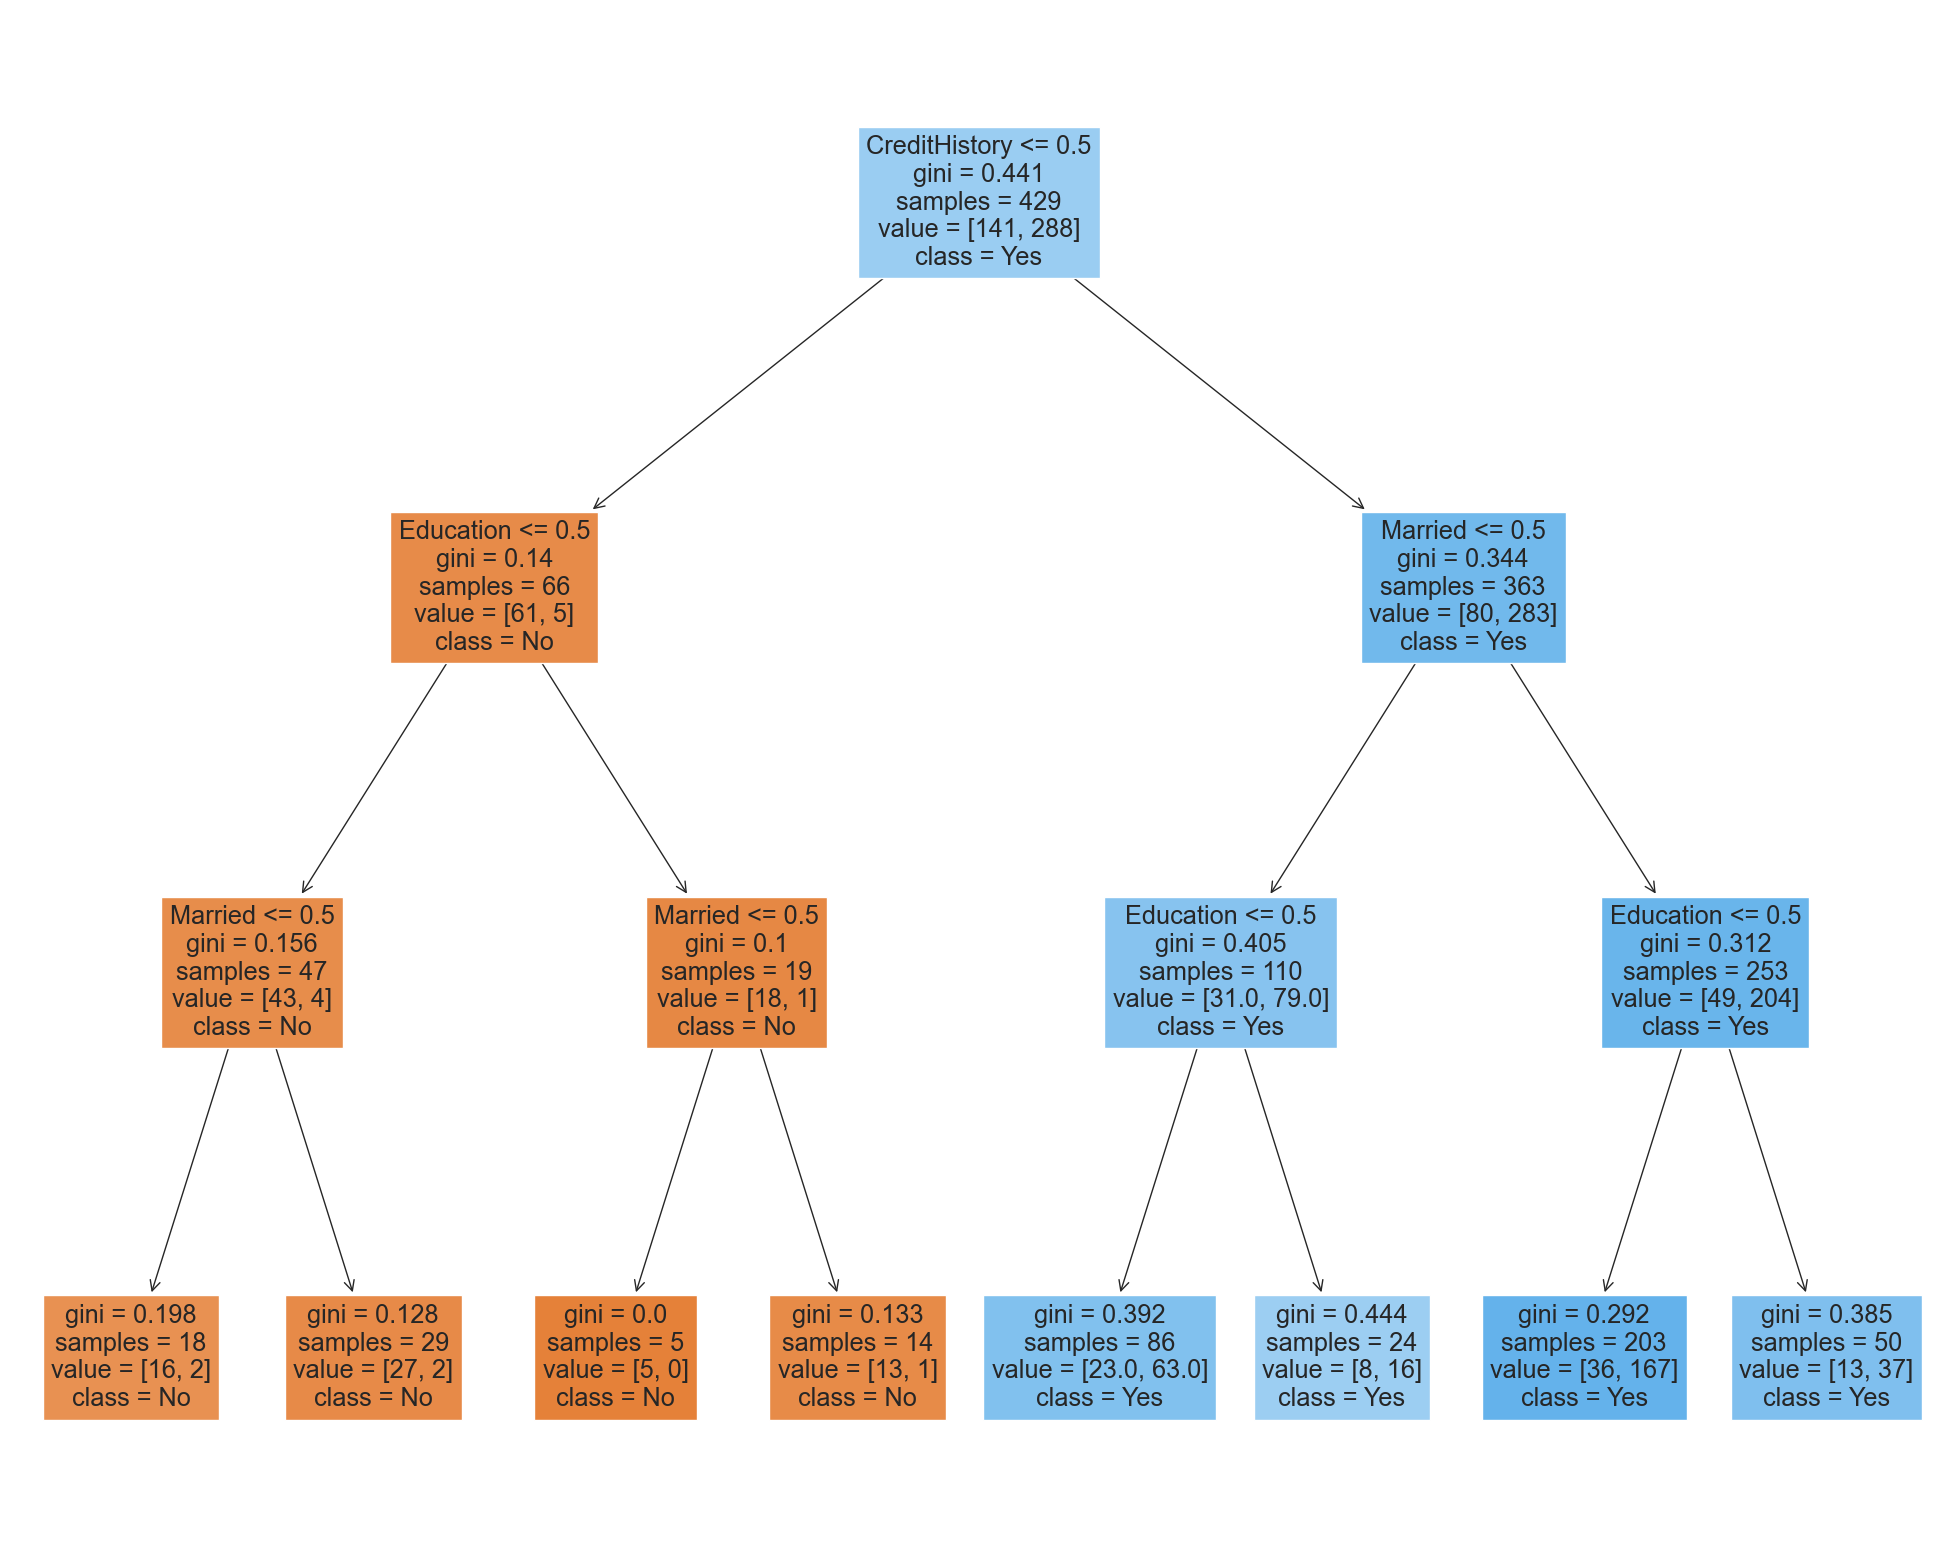

In [895]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['No', 'Yes'],
                   filled=True)

#IF the visualizes decision tree does not show, than please run the code in the five cells above again!


Notifications report of relevant finding from the decision tree
Depth of the decision tree: 4
Number of leaf nodes: 2^(3) = 8. This is because the tree has a depth of 4 and in each depth each node splits itself in two child nodes, starting from the rood node. And because with a depth of four each leaf node is reached by traversing over three edges. 
Number of splits in the dataset = 1 + 2 + 4 = 7 splits. On the top of the three there is one root node, who splits into two child nodes at depth 2, and each child node splits itself again into two new child nodes, until the decision tree has a depth of 4. 


In [898]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [900]:
from sklearn.metrics import confusion_matrix, accuracy_score #,classification_report

In [902]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.8018648018648019


array([[ 61,  80],
       [  5, 283]], dtype=int64)

In [904]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59       141
           1       0.78      0.98      0.87       288

    accuracy                           0.80       429
   macro avg       0.85      0.71      0.73       429
weighted avg       0.83      0.80      0.78       429



# Evaluation and Discussion

In [908]:
test_data_01 = pd.read_csv(r'C:\Users\steve\OneDrive\Bureaublad\LoanPrediction_TestSet.csv', parse_dates=True, delimiter=',')
# Make sure to display the personal file path on pc or laptop, and have the comma (,) sign as the delimiter. 
display(test_data_01)

,Unnamed: 0,LoanID,Gender,Married,Dependents,Education,SelfEmployed,ApplicantIncome,CoapplicantIncome,LoanAmount,LoanAmountTerm,CreditHistory,PropertyArea,LoanStatus
0,0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y


### Pre processing of the test dataset

In [911]:
# Transforming all object to integer data types

test_data_02 = test_data_01.drop(columns=['LoanID', 'Unnamed: 0'])

test_data_02['LoanStatus'] = test_data_02['LoanStatus'].map(dict(Y=1, N=0))
test_data_02['Gender'] = test_data_02['Gender'].map(dict(Male=1, Female=0))
test_data_02['Married'] = test_data_02['Married'].map(dict(Yes=1, No=0))
test_data_02['SelfEmployed'] = test_data_02['SelfEmployed'].map(dict(Yes=1, No=0))
test_data_02['PropertyArea'] = test_data_02['PropertyArea'].map(dict(Rural=0, Semiurban=1, Urban=2))
le = LabelEncoder()
test_data_02['Dependents'] = le.fit_transform(test_data_02['Dependents'])
test_data_02['Education'] = le.fit_transform(test_data_02['Education'])


In [913]:
# check for missing values in the testset and list them
test_data_02.isna().sum()

Gender               11
Married               0
Dependents            0
Education             0
SelfEmployed         23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
LoanAmountTerm        6
CreditHistory        29
PropertyArea          0
LoanStatus            0
dtype: int64

In [915]:
# Filling the missing values with either the mean for a column with numerical values, or the mode if the column values were categorical.

test_data_02['Gender'] = test_data_02['Gender'].fillna(test_data_02['Gender'].mode()[0])
test_data_02['SelfEmployed'] = test_data_02['SelfEmployed'].fillna(test_data_02['SelfEmployed'].mode()[0])
test_data_02['LoanAmount'] = test_data_02['LoanAmount'].fillna(test_data_02['LoanAmount'].mean())
test_data_02['LoanAmountTerm'] = test_data_02['LoanAmountTerm'].fillna(test_data_02['LoanAmountTerm'].mode()[0])
test_data_02['CreditHistory'] = test_data_02['CreditHistory'].fillna(test_data_02['CreditHistory'].mode()[0])

In [917]:
# check for missing values in the testset and list them
test_data_02.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
CreditHistory        0
PropertyArea         0
LoanStatus           0
dtype: int64

In [919]:
# Feature engineering steps

test_data_02['TotalIncome'] = test_data_02['ApplicantIncome'] + test_data_02['CoapplicantIncome']
# moving the new variable feature to the seventh column position
TI_column = test_data_02.pop('TotalIncome')
test_data_02.insert(7, TI_column.name, TI_column)

test_data_02['LoanAmount'] = test_data_02['LoanAmount'] * 1000
test_data_02['LoanAmount'] = round(test_data_02['LoanAmount'], 2)
test_data_02['InstalmentAmount'] = test_data_02['LoanAmount'] / test_data_02['LoanAmountTerm']
test_data_02['InstalmentAmount'] = round(test_data_02['InstalmentAmount'], 2)

# moving the new variable feature to the tenth column position
IA_column = test_data_02.pop('InstalmentAmount')
test_data_02.insert(10, IA_column.name, IA_column)

test_data_02['BalancedIncome'] = test_data_02['TotalIncome'] - test_data_02['InstalmentAmount'] 

# moving the new variable feature to the eleventh column position
BI_column = test_data_02.pop('BalancedIncome')
test_data_02.insert(11, BI_column.name, BI_column)

In [921]:
# Listing the variables with the highest correlation to the target variable, 

my_correlation = test_data_02.corr(method="spearman")['LoanStatus']
sorted = my_correlation.sort_values(key=abs)
top5 = slice(9,-1)
print(sorted[top5])

SelfEmployed       0.080434
TotalIncome        0.081437
BalancedIncome     0.090509
ApplicantIncome    0.165127
CreditHistory      0.961429
Name: LoanStatus, dtype: float64


## Question 13: Using the developed models for the test dataset

#### The logistic regression model

In [926]:

cols =['CreditHistory', 'ApplicantIncome', 'BalancedIncome', 'TotalIncome','SelfEmployed']  
X=test_data_02[cols]
y=test_data_02['LoanStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [928]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.126606
         Iterations 9
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: LoanStatus       Pseudo R-squared: 0.724     
Date:               2024-11-20 21:39 AIC:              102.9288  
No. Observations:   367              BIC:              122.4556  
Df Model:           4                Log-Likelihood:   -46.464   
Df Residuals:       362              LL-Null:          -168.27   
Converged:          1.0000           LLR p-value:      1.5419e-51
No. Iterations:     9.0000           Scale:            1.0000    
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
CreditHistory      6.7471   1.0084  6.6912 0.0000  4.7708  8.7235
ApplicantIncome    0.0003   0.0001  2.7438 0.0061  0.0001  0.0004


In [930]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\steve\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [932]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Although the algorithm run out of iterations, it still produced a good accuracy!')

Accuracy of logistic regression classifier on test set: 0.96
Although the algorithm run out of iterations, it still produced a good accuracy!


In [934]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[18  4]
 [ 0 89]]


In [936]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90        22
           1       0.96      1.00      0.98        89

    accuracy                           0.96       111
   macro avg       0.98      0.91      0.94       111
weighted avg       0.97      0.96      0.96       111



#### The Decision tree model

In [939]:
from sklearn import tree
#from sklearn.tree import DecisionTreeClassifier

import matplotlib.image as pltimg

%matplotlib inline

In [941]:
 
cols=['CreditHistory', 'ApplicantIncome', 'BalancedIncome'] 
# The three variables with the highest correlation with the target variable were used, instead of the top 5. This is because the fourt and fifth \
# predictive variables (LoanAmount and CoapplicantIncome) didnt produce at accurate decision tree after more than three splits in depth.  

X=test_data_02[cols]
y=test_data_02['LoanStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [943]:
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [945]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_0 <= 0.50
|   |--- class: 0
|--- feature_0 >  0.50
|   |--- class: 1



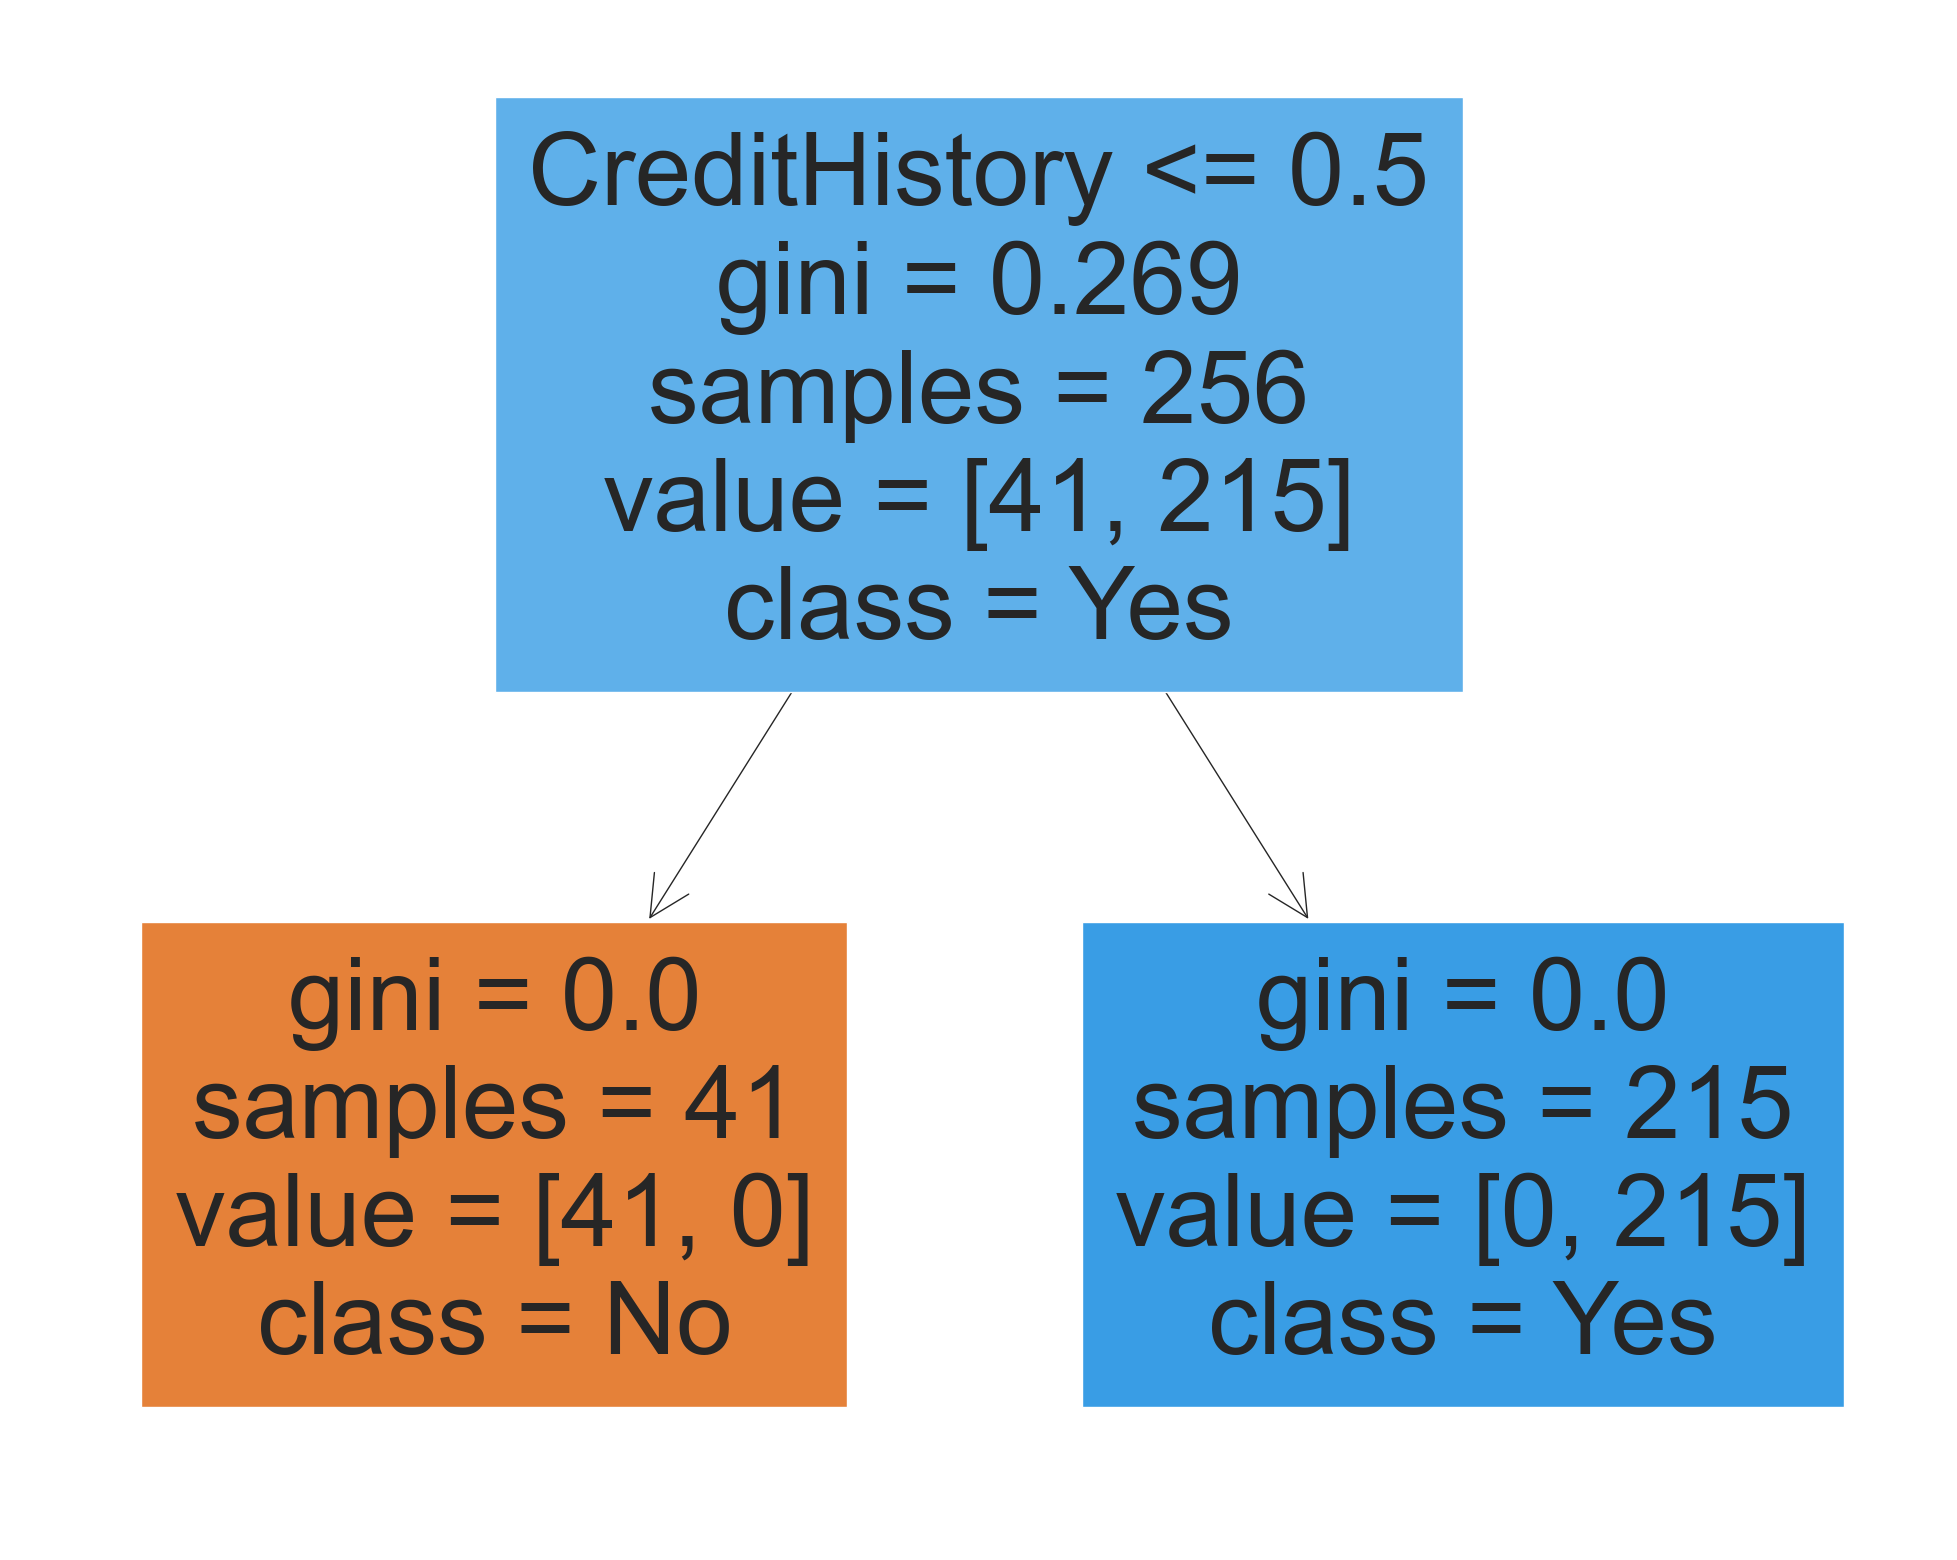

In [947]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X.columns,
                   class_names=['No', 'Yes'],
                   filled=True)

#IF the visualizes decision tree does not show, than please run the code in the five cells above again!


In [949]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [951]:
from sklearn.metrics import confusion_matrix, accuracy_score #,classification_report

In [953]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

1.0


array([[ 41,   0],
       [  0, 215]], dtype=int64)

In [955]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       215

    accuracy                           1.00       256
   macro avg       1.00      1.00      1.00       256
weighted avg       1.00      1.00      1.00       256



### Question 14: Performance discussion of the two models

The performance results on the loan data test set is remarkably better than the performance results on the train dataset for both models. However, the decision tree model is still slightly better than the logistic regression model on the test dataset. This is because of the fact that the variable CreditHistory was very highly correlated to the target variable LoanStatus. When there is very high correlation between two variables most models will perform good, but a decision tree has the potential to outperform, as in this situation. 

The logistic regression model has an accuracy score of 0.96 on the test dataset, and the decision tree model has an accuracy of 1. This means that the decision tree model was able to correctly predict the LoanStatus of all the instances. 

For the precision, recall, and f1 scores, the logistic regression model performed very well, with scores of 0.9 and above. The recall score of the No Class was slighty underperforming with a score of 0,82. Meaning that the algorithm could not always detect a No for the target variable. The decision tree model had performances of all 1 with precision, recall, and f1 scores. 


### Question 15: Suggestions for further improvements

In order to increase the accuracy of the two machine laerning even further, different improvements can be implemented. First the minory class can be upsampeld, which was not applied in the logistic regression and decision tree models. Attempts in creating a model with the upsampled minority 0 class (No-class) resulted in a non-functional model, since the array of the upsampled class with the Yes-class was not of the same size of the array of the target variable. One solution would be to create a new dataframe, with the upsampled No-class representing half of all the instances, but than new instances with each unique features should have been generated, which can be a tedious and error prone proces. 

Another approach in model improvement is the engineering of new feature columns that have a mediocre to strong correlation (between 0.3 and 0.7) with the target variable. In both the train and test dataset, there was only one variable (CreditHistory), which was highly correlated with the target variable (LoanStatus). One Suggestion would be to have a new feature that is a ratio or a percentage between the total income and the loan amount. Also two categorical features can be combined, for example the 'Married' and 'Gender' variables to create new variables, and calculate the correlation between the new categorical variables and the target variable. 

Also parameter tuning is an option to improve the performances of the logistic regression and decision tree models. For example the perfect number of the train size (currently 0.7 for both models) can be found by making different train size suggestions, and let the model run with these different parameter values. 

Finally also more advanced methods can be applied. For example the creation of syntatic data with generative AI, which is a relative new and unknown approach in data science. Also ensemble learning can be applied, by combining both the logistic regression and decision tree model in one overall ensemble model that takes the best from both models. 


End of notebook, part 3: Development, Evaluation, and Discussion 